El objetivo del presente notebook es mostrar un ejemplo del uso de la libreria prophet de Fabeook que permite realizar forecasting de series de tiempo

El presente notebook esta basado en la pagina de prophet: https://facebook.github.io/prophet/docs/quick_start.html

In [88]:
# librerias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [89]:
# [LEER DATOS] Datos - Conjunto: Produccion de electricidad

url = "https://raw.githubusercontent.com/Mishagk/codigos-variados/main/Electric_Production.csv"
df = pd.read_csv(url)

# Columna de tiempo
var_tiempo = "DATE"

# Formato de datos
df['datetime'] = pd.to_datetime(df[var_tiempo])

# Dar formato a estampa de tiempo
formato = '%d-%m-%Y'
df["datetime"] = df["datetime"].dt.strftime(formato)
df['datetime'] = pd.to_datetime(df["datetime"],format=formato)

# Seteo como indice de estampa de tiempo
df = df.set_index("datetime")

# eliminar columna
try:
    df.drop(columns=[var_tiempo],inplace=True)
except:
    pass

# cambiar de nombre
df.rename(columns={"IPG2211A2N":"y"},inplace=True)

# Convertir a tipo numerico
df["y"] = pd.to_numeric(df["y"],errors="coerce")

# ordenar segun indice
df = df.sort_index()

##################

print('Cantidad registros inicio raw :',df.shape[0])

# Setear frecuencia
df = df.asfreq(freq="MS")

print('Cantidad registros seteo freq :',df.shape[0])

Cantidad registros inicio raw : 397
Cantidad registros seteo freq : 397


In [90]:
# [EXPLORAR] Ver dataframe
df

,y
datetime,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


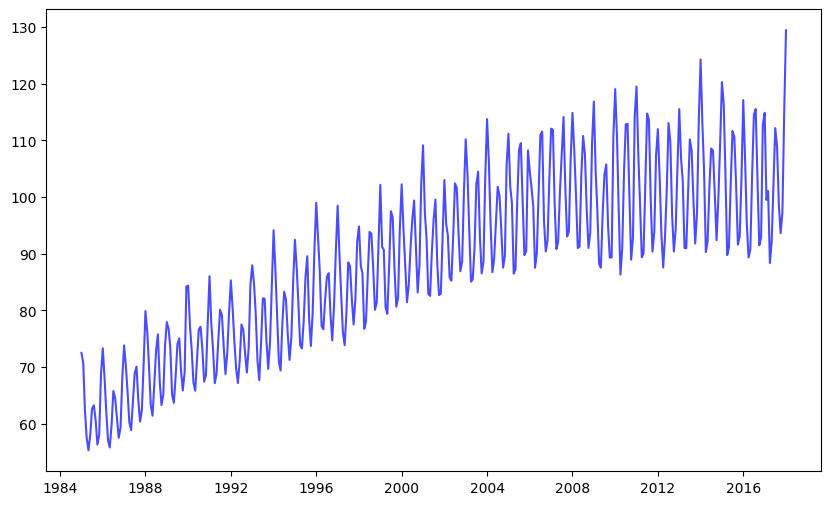

In [91]:
# [EXPLORAR] Ver grafica de datos
plt.figure(figsize=(10,6))
plt.plot(df['y'],'b',alpha=0.7)
plt.show()

In [92]:
# [PREPARACION] Dar formato para invocar con libreria prophet 

## NOTA: Segun documentacion de la libreria se exige tener las columnas: ["ds","y"] 

# Formateo de nombres de columna para usar "prophet"
df = df.reset_index()
df = df.rename(columns={"datetime":"ds"})
df

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


Entrenar modelo

In [93]:
# [CALCULA] Entrenar modelo con prophet (de Facebook)

m = Prophet()
m.fit(df)

22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
# [CALCULA] Prediccion - Determinar nuevos puntos futuros a predecir

periodos = 365
print('Cantidad puntos a predecir:',periodos)

future_ds = m.make_future_dataframe(periods=periodos)
future_ds.tail(periodos)

Cantidad puntos a predecir: 365


,ds
397,2018-01-02
398,2018-01-03
399,2018-01-04
400,2018-01-05
401,2018-01-06
...,...
757,2018-12-28
758,2018-12-29
759,2018-12-30
760,2018-12-31


In [95]:
# [CALCULA] Prediccion - Hacer prediccion de valores

## NOTA: Se encuentra las columnas de intervalos de confianza [y_menor, y_mayor]

y_pred = m.predict(future_ds)
y_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1985-01-01,74.427108,70.552257,77.846343
1,1985-02-01,66.201988,62.733276,69.924107
2,1985-03-01,60.828378,57.113011,64.414399
3,1985-04-01,52.405708,48.850023,56.402925
4,1985-05-01,52.806087,49.064305,56.307370
...,...,...,...,...
757,2018-12-28,121.971151,118.245076,125.400961
758,2018-12-29,120.378652,116.909042,123.988742
759,2018-12-30,119.062735,115.372674,122.476388
760,2018-12-31,118.052659,114.356850,121.727971


In [96]:
# Solo los ultimos valores son los predichos
y_pred.iloc[-periodos:,:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
397,2018-01-02,103.856603,113.187196,120.334832,103.856603,103.856603,12.843042,12.843042,12.843042,12.843042,12.843042,12.843042,0.0,0.0,0.0,116.699645
398,2018-01-03,103.857385,113.058196,120.389563,103.857385,103.857385,12.912281,12.912281,12.912281,12.912281,12.912281,12.912281,0.0,0.0,0.0,116.769666
399,2018-01-04,103.858167,113.369607,120.653229,103.858167,103.858167,13.303461,13.303461,13.303461,13.303461,13.303461,13.303461,0.0,0.0,0.0,117.161628
400,2018-01-05,103.858949,114.289941,121.500419,103.858949,103.858949,13.994826,13.994826,13.994826,13.994826,13.994826,13.994826,0.0,0.0,0.0,117.853775
401,2018-01-06,103.859731,115.270424,122.474120,103.859731,103.859731,14.955867,14.955867,14.955867,14.955867,14.955867,14.955867,0.0,0.0,0.0,118.815598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2018-12-28,104.138118,118.245076,125.400961,104.098789,104.179789,17.833033,17.833033,17.833033,17.833033,17.833033,17.833033,0.0,0.0,0.0,121.971151
758,2018-12-29,104.138900,116.909042,123.988742,104.099399,104.180808,16.239752,16.239752,16.239752,16.239752,16.239752,16.239752,0.0,0.0,0.0,120.378652
759,2018-12-30,104.139682,115.372674,122.476388,104.100009,104.181835,14.923053,14.923053,14.923053,14.923053,14.923053,14.923053,0.0,0.0,0.0,119.062735
760,2018-12-31,104.140464,114.356850,121.727971,104.100659,104.182863,13.912194,13.912194,13.912194,13.912194,13.912194,13.912194,0.0,0.0,0.0,118.052659


## 1. Exploracion de resultados - estatico

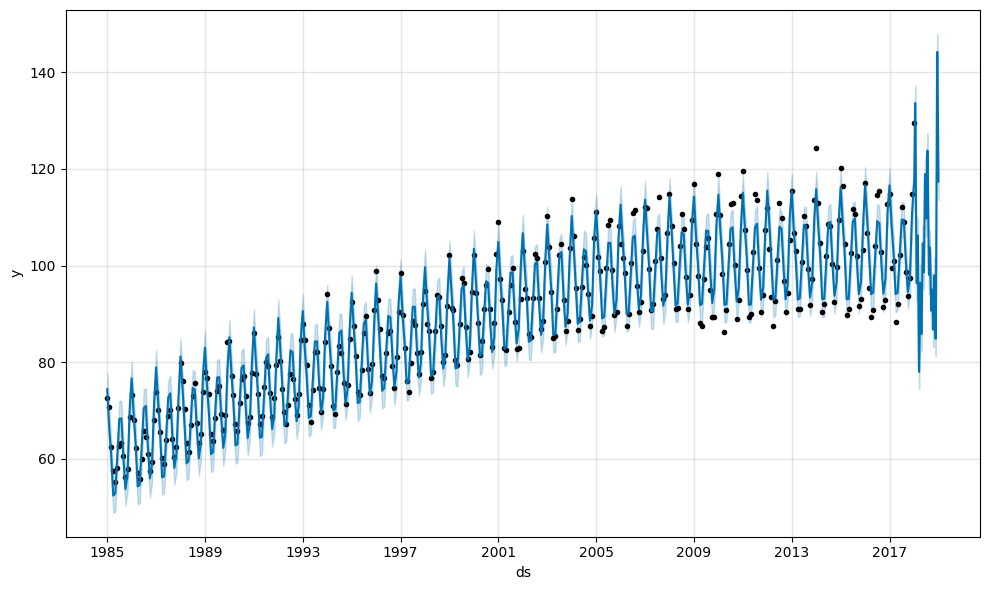

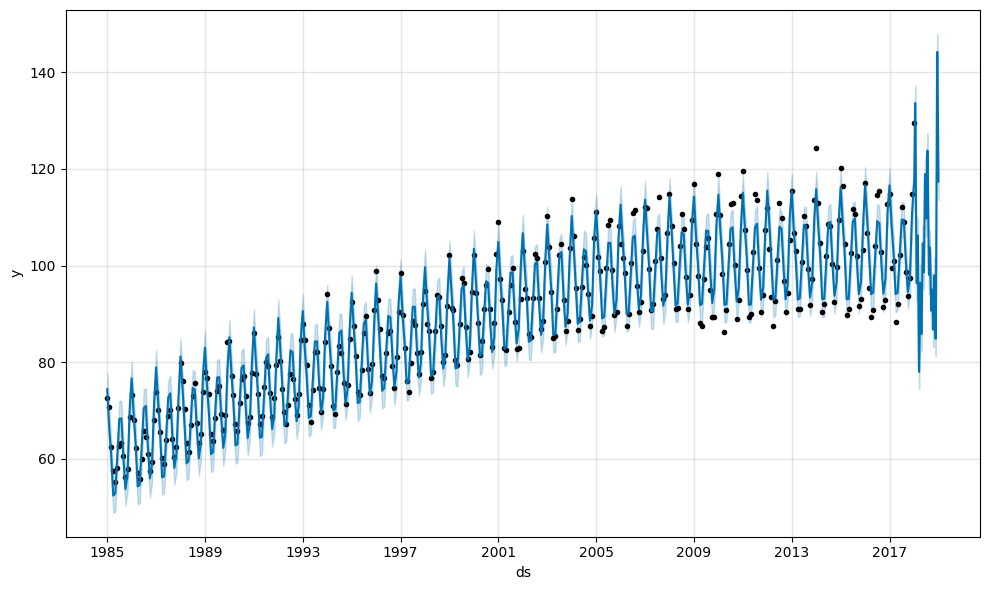

In [97]:
# [EXPLORA] Grafica estatica - Predicciones
m.plot(y_pred)

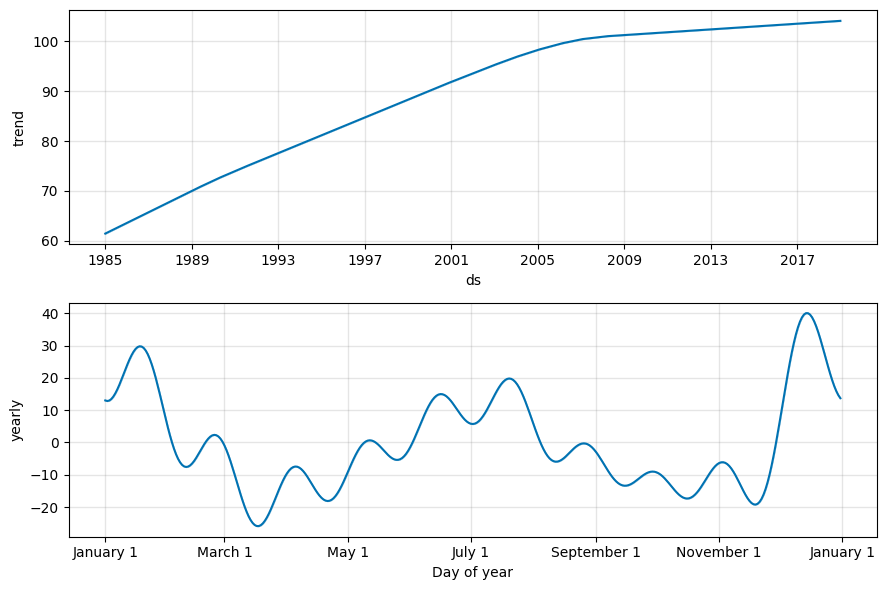

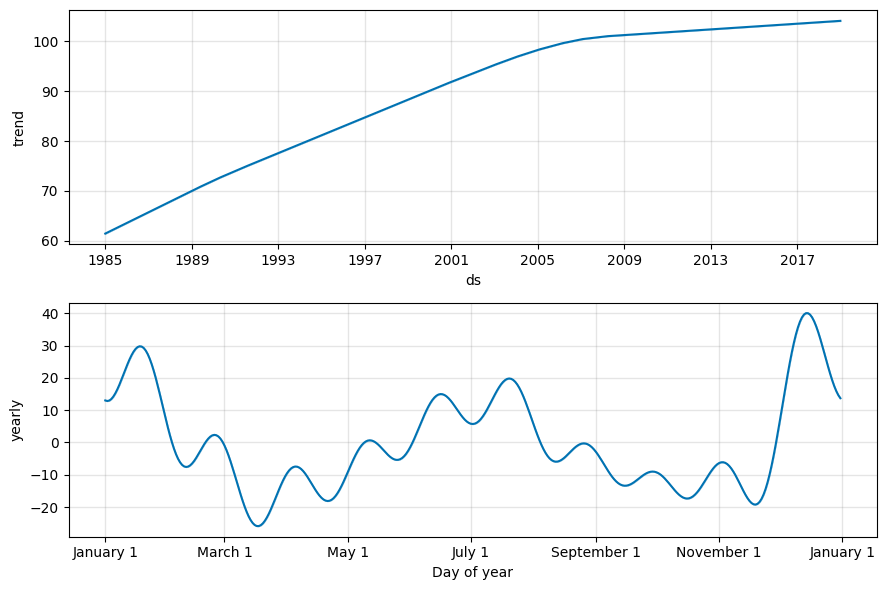

In [98]:
# [EXPLORA] Grafica estatica - Componente segun modelo/predicciones
m.plot_components(y_pred)

## 2. Exploracion de resultados - interactivo (plotly)

In [99]:
# [EXPLORA] Grafica interactiva - Predicciones
from prophet.plot import plot_plotly
plot_plotly(m,y_pred)

In [100]:
# [EXPLORA] Grafica interactiva - Componente segun modelo/prediccion
from prophet.plot import plot_components_plotly
plot_components_plotly(m,y_pred)

## Guardar/Leer modelo

In [101]:
# Guardar modelo a archivo
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Guarda modelo

In [102]:
# Leer modelo de archivo
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(fin.read())  # Leer modelo

In [103]:
# Evaluar prediccion con modelo leido

y_pred1 = m1.predict(future_ds)
y_pred1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1985-01-01,74.427108,70.693588,78.077424
1,1985-02-01,66.201988,62.775789,69.737247
2,1985-03-01,60.828378,57.158868,64.625260
3,1985-04-01,52.405708,48.838786,56.404272
4,1985-05-01,52.806087,48.841113,56.508215
...,...,...,...,...
757,2018-12-28,121.971151,118.452702,125.650141
758,2018-12-29,120.378652,116.493150,123.781730
759,2018-12-30,119.062735,115.219325,122.858455
760,2018-12-31,118.052659,114.628225,121.849536


In [104]:
y_pred1.iloc[-periodos:,:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
397,2018-01-02,103.856603,113.293140,120.504206,103.856603,103.856603,12.843042,12.843042,12.843042,12.843042,12.843042,12.843042,0.0,0.0,0.0,116.699645
398,2018-01-03,103.857385,113.148507,120.543009,103.857385,103.857385,12.912281,12.912281,12.912281,12.912281,12.912281,12.912281,0.0,0.0,0.0,116.769666
399,2018-01-04,103.858167,113.651087,120.656657,103.858167,103.858167,13.303461,13.303461,13.303461,13.303461,13.303461,13.303461,0.0,0.0,0.0,117.161628
400,2018-01-05,103.858949,114.125929,121.552000,103.858949,103.858949,13.994826,13.994826,13.994826,13.994826,13.994826,13.994826,0.0,0.0,0.0,117.853775
401,2018-01-06,103.859731,115.113640,122.703258,103.859731,103.859731,14.955867,14.955867,14.955867,14.955867,14.955867,14.955867,0.0,0.0,0.0,118.815598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2018-12-28,104.138118,118.452702,125.650141,104.095479,104.180091,17.833033,17.833033,17.833033,17.833033,17.833033,17.833033,0.0,0.0,0.0,121.971151
758,2018-12-29,104.138900,116.493150,123.781730,104.096099,104.181568,16.239752,16.239752,16.239752,16.239752,16.239752,16.239752,0.0,0.0,0.0,120.378652
759,2018-12-30,104.139682,115.219325,122.858455,104.096700,104.182922,14.923053,14.923053,14.923053,14.923053,14.923053,14.923053,0.0,0.0,0.0,119.062735
760,2018-12-31,104.140464,114.628225,121.849536,104.097248,104.183917,13.912194,13.912194,13.912194,13.912194,13.912194,13.912194,0.0,0.0,0.0,118.052659
